# Visualization of area
## Comparing original rectangle with different circles

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [109]:
# Calculate all values
def get_shape_values(a, b):
    # make sure that a is smaller than b
    if b < a:
        (a, b) = (b, a)

    # area
    rect_area = a*b

    # Circle dimensions
    circle_radius = np.sqrt(rect_area / np.pi)

    # Calculate the normalized area
    normalized_area = rect_area / np.pi

    # Calculate the side length of the normalized square
    normalized_square_side = np.sqrt(normalized_area)

    # Calculate the radius of the circle with the normalized area
    normalized_circle_radius = normalized_square_side / 2

    return [a, b, circle_radius, normalized_circle_radius]

In [110]:
# plot all shapes for an area
def plot_shapes(values):
    # Unpack the values from the array
    a, b, circle_radius, normalized_circle_radius = values

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Add rectangle
    rectangle = plt.Rectangle((0, 0), a, b, fill=None, edgecolor='blue', linewidth=2, label='Rectangle')
    ax.add_patch(rectangle)

    # Add ellipse
    ellipse = patches.Ellipse((a / 2, b / 2), a, b, fill=None, edgecolor='green', label='Ellipse')
    ax.add_patch(ellipse)

    # Add circle
    circle = plt.Circle((a / 2, b / 2), radius=circle_radius, fill=None, edgecolor='red', linewidth=2, label='Circle')
    ax.add_patch(circle)

    # Add square around the circle
    square_side = 2 * circle_radius
    square = plt.Rectangle((a / 2 - circle_radius, b / 2 - circle_radius), square_side, square_side, fill=None, edgecolor='purple', label='Bounding Square')
    ax.add_patch(square)

    # Add normalized circle
    normalized_square_side = 2 * normalized_circle_radius
    normalized_circle = plt.Circle((a / 2, b / 2), radius=normalized_circle_radius, fill=None, edgecolor='orange', linestyle='--', label='Normalized Circle')
    ax.add_patch(normalized_circle)

    # Calculate the point on the ellipse with the y-coordinate at the normalized square's height
    ellipse_y = b / 2 + normalized_circle_radius
    t = np.arcsin((ellipse_y - b / 2) / (b / 2))
    ellipse_x = a / 2 + (a / 2) * np.cos(t)

    # Add normalized square
    normalized_square = plt.Rectangle((a / 2 - normalized_circle_radius, b / 2 - normalized_circle_radius), normalized_square_side, normalized_square_side, fill=None, edgecolor='cyan', linestyle='--', label='Normalized Square')
    ax.add_patch(normalized_square)

    # Mark the factorization point, center, and the point on the ellipse
    plt.plot([a], [b], 'ro', label=f'Point ({a}, {b})')
    plt.plot([a / 2], [b / 2], 'ko', label=f'Center')
    plt.plot([ellipse_x], [ellipse_y], 'go', label=f'Point on Ellipse at ({ellipse_x:.2f}, {ellipse_y:.2f})')


    # Labels and title
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title(f'Visualization for a*b = {a * b} with a = {a} and b = {b}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

    # Show plot
    plt.show()

In [111]:
def print_data(values):
    a, b, circle_radius, normalized_circle_radius = values

    # Calculate area
    rect_area = a*b
    circle_area = np.pi * circle_radius ** 2
    ellipse_area = np.pi * (a / 2) * (b / 2)
    square_side = 2 * circle_radius
    square_area = square_side ** 2
    normalized_area = rect_area / np.pi


    # Print all area values
    print('Calculated area:')
    print(f'Rectangle: {rect_area}')
    print(f'Circle: {circle_area}')
    print(f'Ellipse: {ellipse_area}')
    print(f'Square: {square_area}')
    print(f'Normalized Square: {normalized_area}')


    # Approximate area values
    print('\n\nApproximate area with pi/4:')
    print(f'El_val: {ellipse_area}')
    print(f'El_pre: {rect_area*np.pi/4}')
    print(f'Sq_val: {square_area}')
    print(f'Sq_pre: {rect_area*4/np.pi}')

    # Print all radius values
    print('\n\nCalculated radius:')
    print(f'Normalized Circle radius: {normalized_circle_radius}')
    print(f'Circle radius: {circle_radius}')
    print(f'Large ellipse radius: {(b / 2)}')

    # Calculate normalized increase
    normalized_increased = ((circle_radius - normalized_circle_radius) / normalized_circle_radius)

    # Calculate circle increase
    circle_increased = (((b / 2) - circle_radius) / circle_radius)

    print('\n\nIncrease percent:')
    print(f'Increase percent from small circle to circle: {normalized_increased}')
    print(f'Increase percent circle to largest value: {circle_increased}')

### Verification of a Point on an Ellipse

The equation of the ellipse is:
$$
\frac{x^2}{\left(\frac{a}{2}\right)^2} + \frac{y^2}{\left(\frac{b}{2}\right)^2} = 1
$$
Now, we substitute $\text{ellipse\_x}$ and $ \text{ellipse\_y}$ into this equation to verify it.

$$
\left( \frac{\text{ellipse\_x} - \frac{a}{2}}{\frac{a}{2}} \right)^2 + \left( \frac{\text{ellipse\_y} - \frac{b}{2}}{\frac{b}{2}} \right)^2 = 1
$$

We can use the following Python function to perform this verification:

In [112]:
def verify_point_on_ellipse(ellipse_x, ellipse_y, a, b):
    """
    Verify if a point (ellipse_x, ellipse_y) lies on the ellipse defined by a and b.

    Parameters:
    ellipse_x (float): x-coordinate of the point
    ellipse_y (float): y-coordinate of the point
    a (float): Length of the major axis of the ellipse
    b (float): Length of the minor axis of the ellipse

    Returns:
    float: The left-hand side of the ellipse equation
    """
    lhs = ((ellipse_x - a / 2)**2 / (a / 2)**2) + ((ellipse_y - b / 2)**2 / (b / 2)**2)
    return lhs

## Shapes

In [113]:
values_17_47 = get_shape_values(17, 47)
print_data(values_17_47)

Calculated area:
Rectangle: 799
Circle: 799.0
Ellipse: 627.5331325545612
Square: 1017.318396243395
Normalized Square: 254.32959906084875


Approximate area with pi/4:
El_val: 627.5331325545612
El_pre: 627.5331325545611
Sq_val: 1017.318396243395
Sq_pre: 1017.318396243395


Calculated radius:
Normalized Circle radius: 7.973857270180611
Circle radius: 15.947714540361222
Large ellipse radius: 23.5


Increase percent:
Increase percent from small circle to circle: 1.0
Increase percent circle to largest value: 0.4735653776925277


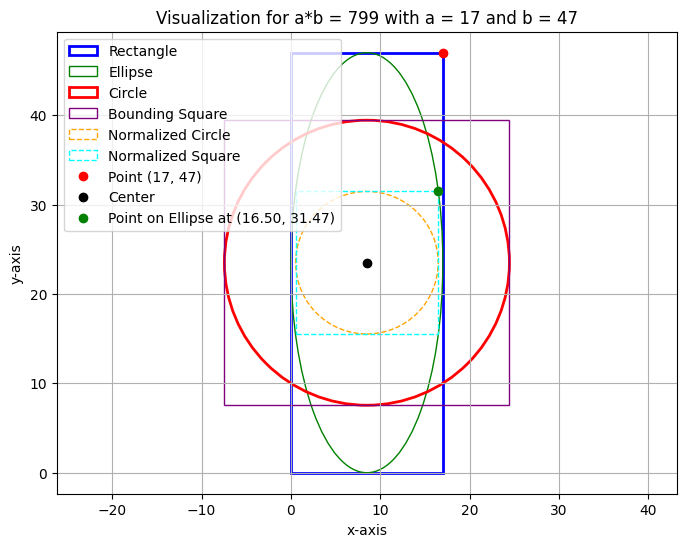

In [114]:
plot_shapes(values_17_47)

In [115]:
verify_point_on_ellipse(16.5, 31.37, 17, 47)

0.9979668835105209

In [116]:
# most down point
verify_point_on_ellipse(17/2, 0, 17, 47)

1.0

In [117]:
# most up point
verify_point_on_ellipse(17/2, 47, 17, 47)

1.0

In [118]:
# most left point
verify_point_on_ellipse(0, 47/2, 17, 47)

1.0

In [119]:
def verify_point_on_ellipse(ellipse_x, ellipse_y, a, b):
    """
    Verify if a point (ellipse_x, ellipse_y) lies on the ellipse defined by a and b.

    Parameters:
    ellipse_x (float): x-coordinate of the point
    ellipse_y (float): y-coordinate of the point
    a (float): Length of the major axis of the ellipse
    b (float): Length of the minor axis of the ellipse

    Returns:
    float: The left-hand side of the ellipse equation
    """
    lhs = ((ellipse_x - a / 2)**2 / (a / 2)**2) + ((ellipse_y - b / 2)**2 / (b / 2)**2)
    return lhs

verify_point_on_ellipse(16.5, 31.37, 17, 47)

0.9979668835105209

In [120]:
values_17_31 = get_shape_values(17, 31)
print_data(values_17_31)

Calculated area:
Rectangle: 527
Circle: 527.0000000000001
Ellipse: 413.9048321104553
Square: 670.9972400754309
Normalized Square: 167.7493100188577


Approximate area with pi/4:
El_val: 413.9048321104553
El_pre: 413.90483211045523
Sq_val: 670.9972400754309
Sq_pre: 670.9972400754308


Calculated radius:
Normalized Circle radius: 6.475903605267332
Circle radius: 12.951807210534664
Large ellipse radius: 15.5


Increase percent:
Increase percent from small circle to circle: 1.0
Increase percent circle to largest value: 0.19674418774491192


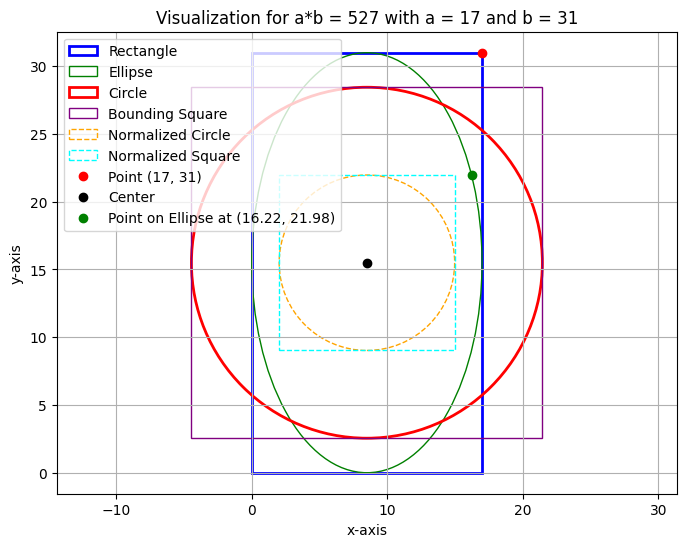

In [121]:
plot_shapes(values_17_31)

In [122]:
values_17_79 = get_shape_values(17, 79)
print_data(values_17_79)

Calculated area:
Rectangle: 1343
Circle: 1342.9999999999998
Ellipse: 1054.789733442773
Square: 1709.9607085793234
Normalized Square: 427.4901771448309


Approximate area with pi/4:
El_val: 1054.789733442773
El_pre: 1054.789733442773
Sq_val: 1709.9607085793234
Sq_pre: 1709.9607085793236


Calculated radius:
Normalized Circle radius: 10.337917792583172
Circle radius: 20.675835585166343
Large ellipse radius: 39.5


Increase percent:
Increase percent from small circle to circle: 1.0
Increase percent circle to largest value: 0.9104427406232062


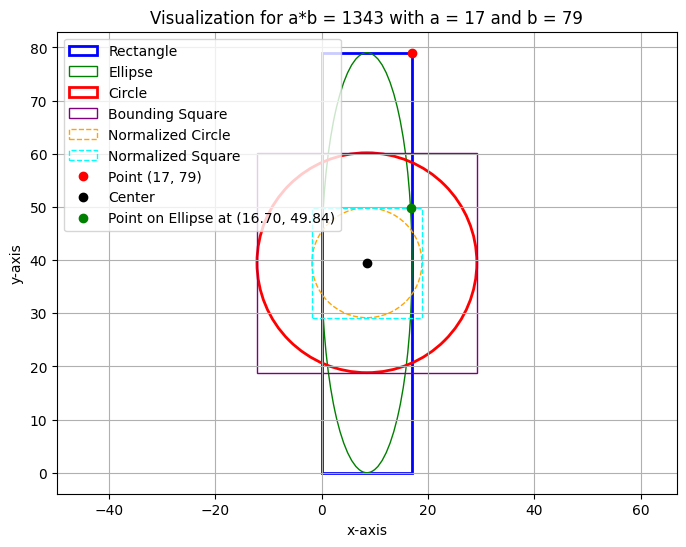

In [123]:
plot_shapes(values_17_79)

In [124]:
a = 28841
b = 34617
values_a_b = get_shape_values(a, b)
print_data(values_a_b)

Calculated area:
Rectangle: 998388897
Circle: 998388897.0
Ellipse: 784132806.0602043
Square: 1271188224.6849213
Normalized Square: 317797056.1712303


Approximate area with pi/4:
El_val: 784132806.0602043
El_pre: 784132806.0602041
Sq_val: 1271188224.6849213
Sq_pre: 1271188224.6849213


Calculated radius:
Normalized Circle radius: 8913.43166478588
Circle radius: 17826.86332957176
Large ellipse radius: 17308.5


Increase percent:
Increase percent from small circle to circle: 1.0
Increase percent circle to largest value: -0.029077652079818314


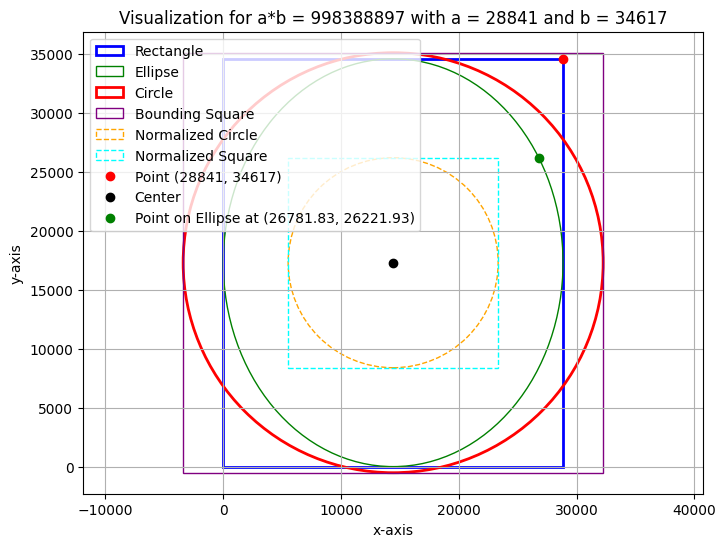

In [125]:
plot_shapes(values_a_b)